In [387]:
import matplotlib as plt
import numpy as np
import pandas as pd

import csv

## I. Pre - Processing the dataset

In [388]:
# read the dataset
url = 'data_example.csv'
df = pd.read_csv(url)
print (df)

        Unnamed: 0   date_time       event_name  level  \
0               40  2023-10-28       game_start      1   
1               41  2023-10-28       game_start      1   
2               42  2023-10-28       game_start      2   
3               43  2023-10-28       game_start      3   
4               44  2023-10-28       game_start      4   
...            ...         ...              ...    ...   
798327     7957940  2023-11-03  user_engagement      1   
798328     7957941  2023-11-01  user_engagement      1   
798329     7957942  2023-11-01  user_engagement      1   
798330     7957944  2023-11-01  user_engagement      1   
798331     7957952  2023-11-03  user_engagement      1   

                                        user  day_diff        day0 mode_game  \
0       1cffd052-4616-4d29-bfd5-950e23b763d4       0.0  2023-10-28    normal   
1       1cffd052-4616-4d29-bfd5-950e23b763d4       0.0  2023-10-28    normal   
2       1cffd052-4616-4d29-bfd5-950e23b763d4       0.0  2023-10



| **Label**           | **Meaning**                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `Unnamed: 0`        | Likely an index column automatically generated by a data processing tool.   |
| `date_time`         | The date and time when the event occurred.                                   |
| `event_name`        | The name of the event (`game_end`).                                    |
| `level`             | The level of the game at which the event occurred.                           |
| `user`              | A unique identifier for the user (likely a UUID).                            |
| `day_diff`          | The difference in days between the current event and the first recorded event (`day0`) for this user. |
| `day0`              | The date of the first recorded event for this user.                          |
| `mode_game`         | The mode of the game (`normal`).                                       |
| `win`               | A flag indicating whether the game was won (`1.0`) or lost (`0.0`), null is (`-1.0 `)         |
| `reason_to_die`     | The reason why the game ended or the player lost (e.g., `out_of_lives`).     |
| `quantity`          | An additional quantity related to the event (exact meaning depends on context, could be score, points, etc.). |
| `version`           | The version of the game when the event occurred.                             |



In [389]:
# missing values
df.isnull()
df.isna()
# count missing values in each column
df.isnull().sum()
print(df)

        Unnamed: 0   date_time       event_name  level  \
0               40  2023-10-28       game_start      1   
1               41  2023-10-28       game_start      1   
2               42  2023-10-28       game_start      2   
3               43  2023-10-28       game_start      3   
4               44  2023-10-28       game_start      4   
...            ...         ...              ...    ...   
798327     7957940  2023-11-03  user_engagement      1   
798328     7957941  2023-11-01  user_engagement      1   
798329     7957942  2023-11-01  user_engagement      1   
798330     7957944  2023-11-01  user_engagement      1   
798331     7957952  2023-11-03  user_engagement      1   

                                        user  day_diff        day0 mode_game  \
0       1cffd052-4616-4d29-bfd5-950e23b763d4       0.0  2023-10-28    normal   
1       1cffd052-4616-4d29-bfd5-950e23b763d4       0.0  2023-10-28    normal   
2       1cffd052-4616-4d29-bfd5-950e23b763d4       0.0  2023-10

In [390]:
pip install pandas scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [391]:
# Convert the 'date_time' column to a datetime object
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract the numeric representation of the date (e.g., number of days since a reference date)
df['date_numeric'] = (df['date_time'] - pd.Timestamp('1970-01-01')).dt.days

In [392]:
print(df.columns)

Index(['Unnamed: 0', 'date_time', 'event_name', 'level', 'user', 'day_diff',
       'day0', 'mode_game', 'win', 'reason_to_die', 'quantity', 'version',
       'date_numeric'],
      dtype='object')


In [393]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [394]:
print(df.dtypes)

Unnamed: 0                int64
date_time        datetime64[ns]
event_name               object
level                     int64
user                     object
day_diff                float64
day0                     object
mode_game                object
win                     float64
reason_to_die            object
quantity                  int64
version                  object
date_numeric              int64
dtype: object


In [395]:
#Using pandas describe() to find outliers
df.describe()

,Unnamed: 0,date_time,level,day_diff,win,quantity,date_numeric
count,7.983320e+05,798332,798332.000000,798332.000000,243697.000000,798332.000000,798332.000000
mean,2.453789e+06,2023-10-31 19:37:23.427546368,22.252668,0.999837,0.518201,14.797696,19661.817632
min,4.000000e+01,2023-10-28 00:00:00,1.000000,0.000000,0.000000,-2.000000,19658.000000
25%,1.243709e+06,2023-10-30 00:00:00,3.000000,0.000000,0.000000,0.000000,19660.000000
50%,2.470328e+06,2023-11-01 00:00:00,9.000000,0.000000,1.000000,0.000000,19662.000000
75%,3.570308e+06,2023-11-03 00:00:00,21.000000,1.000000,1.000000,12.000000,19664.000000
max,7.957952e+06,2023-11-10 00:00:00,519.000000,7.000000,1.000000,15642.000000,19671.000000
std,1.408433e+06,NaN,42.809470,1.712700,0.499670,54.181532,2.530112


In [396]:
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) 
threshold = 3
outliers = np.where(z_scores > threshold)
print("Outliers:")
print(df.iloc[outliers[0]])

Outliers:
        Unnamed: 0  date_time       event_name  level  \
14              54 2023-10-30         game_end      5   
184            754 2023-10-28         game_end      7   
296           1091 2023-11-04       game_start      5   
297           1092 2023-11-04       game_start      6   
298           1093 2023-11-04       game_start      7   
...            ...        ...              ...    ...   
798327     7957940 2023-11-03  user_engagement      1   
798328     7957941 2023-11-01  user_engagement      1   
798329     7957942 2023-11-01  user_engagement      1   
798330     7957944 2023-11-01  user_engagement      1   
798331     7957952 2023-11-03  user_engagement      1   

                                        user  day_diff        day0 mode_game  \
14      1cffd052-4616-4d29-bfd5-950e23b763d4       2.0  2023-10-28    normal   
184     a0ef654f-dded-4d4a-a856-0642ab621cc7       0.0  2023-10-28    normal   
296     803dad1b-dd48-47a4-a039-61e5e237cdb2       7.0  2023-10-2

In [397]:
# Remove rows with outliers
df_cleaned = df[(z_scores < threshold).all(axis=1)]

# Save the processed DataFrame
df_cleaned.to_csv("Data_Changed.csv", index=False)
df.to_csv('Data_Changed.csv')

In [398]:
print (df)

        Unnamed: 0  date_time       event_name  level  \
0               40 2023-10-28       game_start      1   
1               41 2023-10-28       game_start      1   
2               42 2023-10-28       game_start      2   
3               43 2023-10-28       game_start      3   
4               44 2023-10-28       game_start      4   
...            ...        ...              ...    ...   
798327     7957940 2023-11-03  user_engagement      1   
798328     7957941 2023-11-01  user_engagement      1   
798329     7957942 2023-11-01  user_engagement      1   
798330     7957944 2023-11-01  user_engagement      1   
798331     7957952 2023-11-03  user_engagement      1   

                                        user  day_diff        day0 mode_game  \
0       1cffd052-4616-4d29-bfd5-950e23b763d4       0.0  2023-10-28    normal   
1       1cffd052-4616-4d29-bfd5-950e23b763d4       0.0  2023-10-28    normal   
2       1cffd052-4616-4d29-bfd5-950e23b763d4       0.0  2023-10-28    norma

In [399]:
df.drop_duplicates(inplace=True)

In [400]:
df.drop('Unnamed: 0', axis=1)

,date_time,event_name,level,user,day_diff,day0,mode_game,win,reason_to_die,quantity,version,date_numeric
0,2023-10-28,game_start,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,NaN,NaN,0,1.6.0,19658
1,2023-10-28,game_start,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,NaN,NaN,0,1.6.0,19658
2,2023-10-28,game_start,2,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,NaN,NaN,0,1.6.0,19658
3,2023-10-28,game_start,3,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,NaN,NaN,0,1.6.0,19658
4,2023-10-28,game_start,4,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,NaN,NaN,0,1.6.0,19658
...,...,...,...,...,...,...,...,...,...,...,...,...
798327,2023-11-03,user_engagement,1,9e431681-4d3c-4a26-9a1a-e8678f8a81ca,0.0,2023-11-03,ss,NaN,NaN,0,1.6.0,19664
798328,2023-11-01,user_engagement,1,74950e5190338a81088f060d669900df,0.0,2023-11-01,ss,NaN,NaN,0,1.6.0,19662
798329,2023-11-01,user_engagement,1,e5800d26-6cb7-4bc1-8813-4060758a351d,0.0,2023-11-01,ss,NaN,NaN,0,1.6.0,19662
798330,2023-11-01,user_engagement,1,8c087bb7-00e3-4050-9906-3ded915472fc,0.0,2023-11-01,ss,NaN,NaN,0,1.6.0,19662


In [401]:
df.to_csv('Data_Changed.csv')

### Điền giá trị thiếu (NaN) trong cột win

In [402]:
# Fill NaN values in 'win' with 0
df['win'].fillna(0, inplace=True)

# Print the count of unique values in 'win' column
print("\nCount of values in 'win' column: \n")
print(df['win'].value_counts().rename_axis('win').rename('count').to_markdown(numalign="left", stralign="left"))

# Get all columns starting with 'reason_to_die_'
reason_to_die_cols = [col for col in df.columns if col.startswith('reason_to_die_')]

# Print the count of unique values for each 'reason_to_die_' column
for col in reason_to_die_cols:
  print(f"\nCount of values in '{col}' column: \n")
  print(df[col].value_counts().rename_axis(col).rename('count').to_markdown(numalign="left", stralign="left"))



Count of values in 'win' column: 

| win   | count   |
|:------|:--------|
| 0     | 672048  |
| 1     | 126284  |


In [403]:
pip install graphviz


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [404]:
# Loại bỏ cột không cần thiết
df.drop(columns=['Unnamed: 0', 'date_time', 'day0', 'user'], inplace=True)

In [405]:
# Điền giá trị thiếu cho cột 'win'
df['win'].fillna(0, inplace=True)

In [406]:
# One-hot encoding cho các cột phân loại
categorical_cols = ['event_name', 'mode_game', 'reason_to_die', 'version']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

In [407]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df.drop(columns=['win'])
y = df['win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [408]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
import graphviz

# Xây dựng mô hình Decision Tree
model = DecisionTreeClassifier(random_state=42)  # Thêm random_state để tái lặp kết quả
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# Trực quan hóa cây quyết định (nếu cần)
dot_data = export_graphviz(model, out_file=None, feature_names=X.columns, class_names=['Lose', 'Win'], filled=True, rounded=True, special_characters=True)

Accuracy: 1.00

Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    134206
         1.0       1.00      1.00      1.00     25461

    accuracy                           1.00    159667
   macro avg       1.00      1.00      1.00    159667
weighted avg       1.00      1.00      1.00    159667


Confusion Matrix:

[[134206      0]
 [     0  25461]]


## II. EDA

Columns in DataFrame: Index(['level', 'day_diff', 'win', 'quantity', 'date_numeric',
       'event_name_game_end', 'event_name_game_start', 'event_name_tutorial',
       'event_name_user_engagement', 'mode_game_normal', 'mode_game_ss',
       'mode_game_tutorial', 'mode_game_ue', 'reason_to_die_out_of_lives',
       'reason_to_die_out_of_lives_plus', 'reason_to_die_nan', 'version_1.5.2',
       'version_1.6.0'],
      dtype='object')


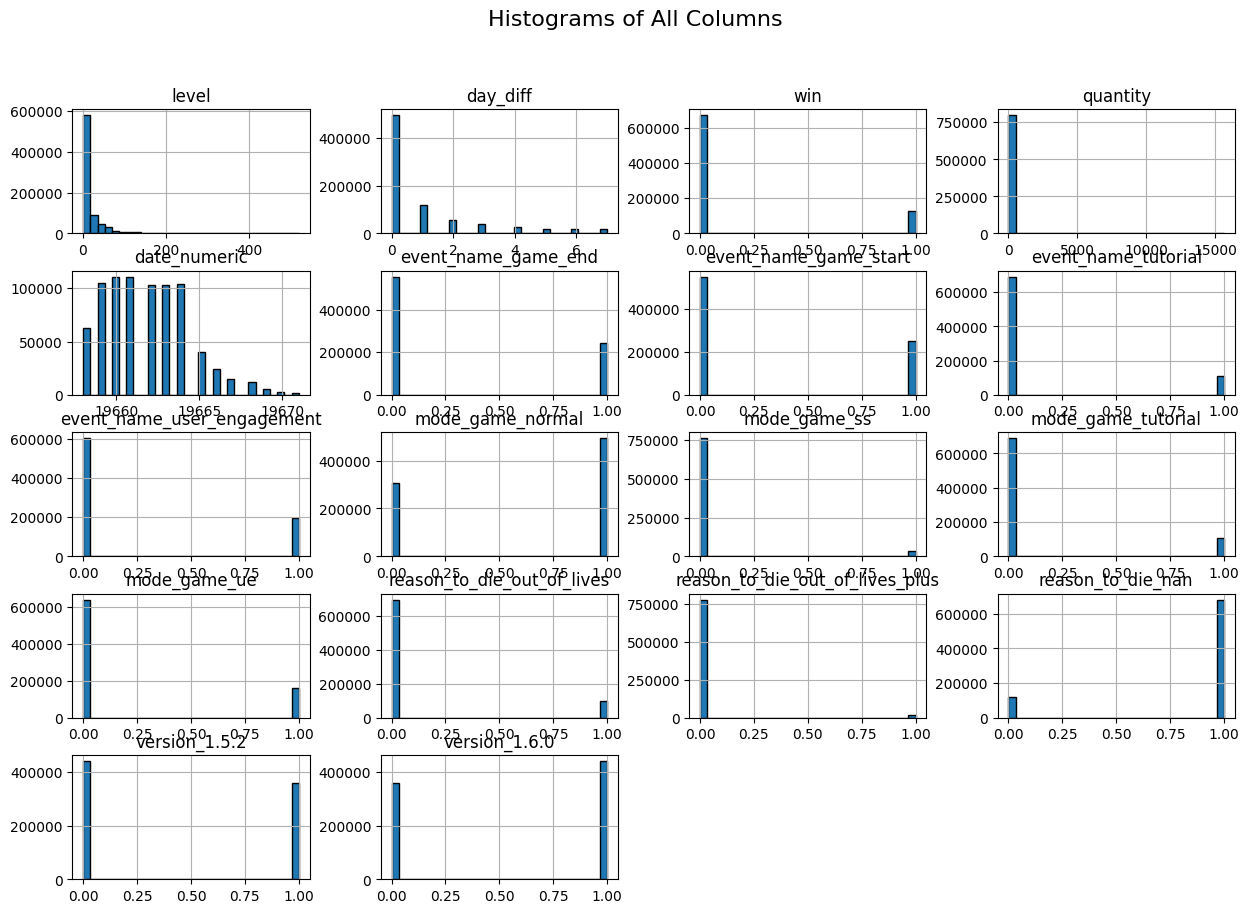

In [409]:
import matplotlib.pyplot as plt

# Kiểm tra lại tên các cột trong DataFrame
print("Columns in DataFrame:", df.columns)

# Vẽ biểu đồ histogram cho các cột
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of All Columns', fontsize=16)
plt.show()

Từ các biểu đồ histogram, ta có thể rút ra một số nhận xét về phân bố của các cột dữ liệu:

**Các cột số:**

* **level:** Phân bố không đồng đều, tập trung chủ yếu ở các giá trị thấp.
* **day_diff:** Hầu hết các giá trị bằng 0, cho thấy phần lớn các sự kiện xảy ra trong cùng một ngày.
* **quantity:** Phần lớn các giá trị bằng 0.

**Các cột one-hot encoded:**

* **event_name:** Sự kiện "game_start" chiếm đa số.
* **mode_game:** Chế độ chơi "normal" là phổ biến nhất.
* **reason_to_die:** Phần lớn người chơi không chết ("No Death") hoặc chết do hết mạng ("out_of_lives").
* **version:** Phiên bản "1.6.0" được sử dụng nhiều hơn so với "1.5.2".

**Cột mục tiêu:**

* **win:** Tập dữ liệu có sự mất cân bằng về phân bố, với số lượng người chơi thua ("0") nhiều hơn đáng kể so với số lượng người chơi thắng ("1").

**Nhận xét chung:**

* Các cột one-hot encoded chỉ có giá trị 0 hoặc 1, điều này là do chúng đã được mã hóa one-hot.
* Sự mất cân bằng trong cột mục tiêu `win` có thể ảnh hưởng đến hiệu suất của mô hình học máy, đặc biệt là đối với các lớp thiểu số.
* Các cột `level`, `day_diff` và `quantity` có phân bố lệch phải, với phần lớn các giá trị tập trung ở phía bên trái của biểu đồ.

**Ảnh hưởng đến mô hình Decision Tree:**

* **Mất cân bằng dữ liệu:** Sự mất cân bằng trong cột mục tiêu `win` có thể khiến mô hình Decision Tree có xu hướng dự đoán người chơi sẽ thua nhiều hơn, do đó cần xem xét các kỹ thuật xử lý mất cân bằng dữ liệu như oversampling, undersampling hoặc sử dụng trọng số lớp.
* **Các cột có phân bố lệch:** Các cột có phân bố lệch phải như `level`, `day_diff` và `quantity` có thể không đóng góp nhiều vào khả năng dự đoán của mô hình. Có thể cân nhắc việc loại bỏ hoặc biến đổi các cột này trước khi xây dựng mô hình.
* **Các cột one-hot encoded:** Các cột one-hot encoded đã sẵn sàng để sử dụng trong mô hình Decision Tree.

**Khuyến nghị:**

1. **Xử lý mất cân bằng dữ liệu:** Áp dụng các kỹ thuật xử lý mất cân bằng dữ liệu để cải thiện khả năng dự đoán của mô hình trên lớp thiểu số (người chơi thắng).
2. **Xem xét các cột có phân bố lệch:** Đánh giá tầm quan trọng của các cột này đối với mô hình và cân nhắc loại bỏ hoặc biến đổi chúng nếu cần thiết.
3. **Thử nghiệm các mô hình khác:** So sánh hiệu suất của mô hình Decision Tree với các mô hình khác như Random Forest, XGBoost hoặc LightGBM để tìm ra mô hình phù hợp nhất cho bài toán.

**Lưu ý:** Đây chỉ là những nhận xét sơ bộ dựa trên biểu đồ histogram. Để có đánh giá chi tiết hơn, cần thực hiện thêm các phân tích thống kê và thử nghiệm với các mô hình học máy khác nhau.

In [410]:
print(df)
df.describe()

        level  day_diff  win  quantity  date_numeric  event_name_game_end  \
0           1       0.0  0.0         0         19658                  0.0   
1           1       0.0  0.0         0         19658                  0.0   
2           2       0.0  0.0         0         19658                  0.0   
3           3       0.0  0.0         0         19658                  0.0   
4           4       0.0  0.0         0         19658                  0.0   
...       ...       ...  ...       ...           ...                  ...   
798327      1       0.0  0.0         0         19664                  0.0   
798328      1       0.0  0.0         0         19662                  0.0   
798329      1       0.0  0.0         0         19662                  0.0   
798330      1       0.0  0.0         0         19662                  0.0   
798331      1       0.0  0.0         0         19664                  0.0   

        event_name_game_start  event_name_tutorial  \
0                    

,level,day_diff,win,quantity,date_numeric,event_name_game_end,event_name_game_start,event_name_tutorial,event_name_user_engagement,mode_game_normal,mode_game_ss,mode_game_tutorial,mode_game_ue,reason_to_die_out_of_lives,reason_to_die_out_of_lives_plus,reason_to_die_nan,version_1.5.2,version_1.6.0
count,798332.000000,798332.000000,798332.000000,798332.000000,798332.000000,798332.000000,798332.000000,798332.000000,798332.000000,798332.000000,798332.000000,798332.000000,798332.000000,798332.000000,798332.000000,798332.000000,798332.000000,798332.000000
mean,22.252668,0.999837,0.158185,14.797696,19661.817632,0.305258,0.312901,0.136017,0.245824,0.618159,0.045536,0.136017,0.200288,0.125219,0.021854,0.852927,0.448082,0.551918
std,42.809470,1.712700,0.364914,54.181532,2.530112,0.460517,0.463675,0.342807,0.430575,0.485838,0.208477,0.342807,0.400216,0.330967,0.146208,0.354179,0.497298,0.497298
min,1.000000,0.000000,0.000000,-2.000000,19658.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,19660.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000,0.000000,19662.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,21.000000,1.000000,0.000000,12.000000,19664.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,519.000000,7.000000,1.000000,15642.000000,19671.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Chuyển đổi cột date_time thành dạng số (timestamp)
df['date_time'] = pd.to_datetime(df['date_time'])
df['date_time'] = df['date_time'].astype(int) / 10**9  # Chuyển đổi sang giây kể từ epoch

# Label Encoding cho các cột: event_name, day0, reason_to_die, version
label_encoders = {}
for column in ['event_name', 'day0', 'reason_to_die', 'version']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# One-Hot Encoding cho cột mode_game
df = pd.get_dummies(df, columns=['mode_game'])

# Hiển thị dữ liệu sau khi chuyển đổi
df.head()